## Stationarity Test

It is important to ensure the time series is stationary before it can be used to fit forecasting models. If the time series is non-stationary (i.e if the means, variances, covariances changes with time), it cannot be used for predicting future data points.
We check for non-stationarity by comparing the following methods:
1. Statistical test - Augmented Dickey Fuller Test. If the p-value obtained <= 0.05, the null hypothesis that the data is not stationary, can be rejected
2. Visualizations - A clear upwared trend indicates non-stationarity

In [ ]:
import import_ipynb
import data_analysis
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf

In [2]:
ds = data_analysis.dataset

In [3]:
#  Function referenced from statsmodel docs
def adf_test(timeseries):
    print("Results of Dickey-Fuller Test:")
    dftest = adfuller(timeseries, autolag="AIC")
    dfoutput = pd.Series(
        dftest[0:4],
        index=[
            "Test Statistic",
            "p-value",
            "#Lags Used",
            "Number of Observations Used",
        ],
    )
    for key, value in dftest[4].items():
        dfoutput["Critical Value (%s)" % key] = value
    print(dfoutput)

### Verizon

In [4]:
VZ = ds['VZ']
adf_test(VZ)

Results of Dickey-Fuller Test:
Test Statistic                  -3.088076
p-value                          0.027448
#Lags Used                      13.000000
Number of Observations Used    494.000000
Critical Value (1%)             -3.443657
Critical Value (5%)             -2.867408
Critical Value (10%)            -2.569896
dtype: float64


The Augmented Dickey-Fuller Test for Verizon stock prices shows the p-value obtained is less than 0.05. So theoretically we can reject the null hypothesis that the time series is a random walk.

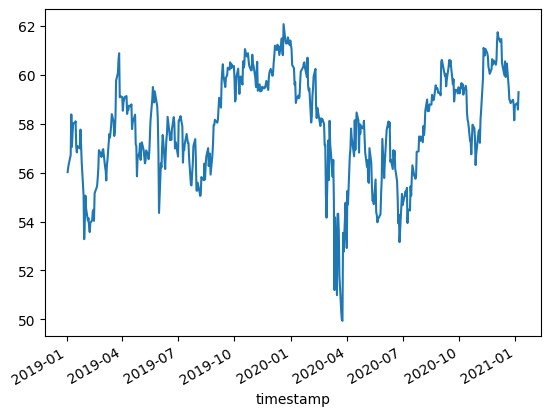

In [5]:
VZ.plot();

Looking at the above plot, it looks close to a random walk. So, we decide to take differences of the data.

In [6]:
#Removing non-stationarity
VZ_diff = VZ.diff().dropna()

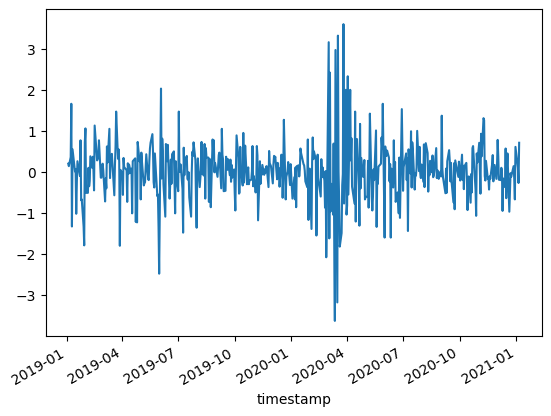

In [7]:
VZ_diff.plot();

In [8]:
#Running adf test again after removing non-stationarity
adf_test(VZ_diff)

Results of Dickey-Fuller Test:
Test Statistic                -6.579735e+00
p-value                        7.566979e-09
#Lags Used                     1.200000e+01
Number of Observations Used    4.940000e+02
Critical Value (1%)           -3.443657e+00
Critical Value (5%)           -2.867408e+00
Critical Value (10%)          -2.569896e+00
dtype: float64


#### Autocorrelation plots before and after removing non-stationarity

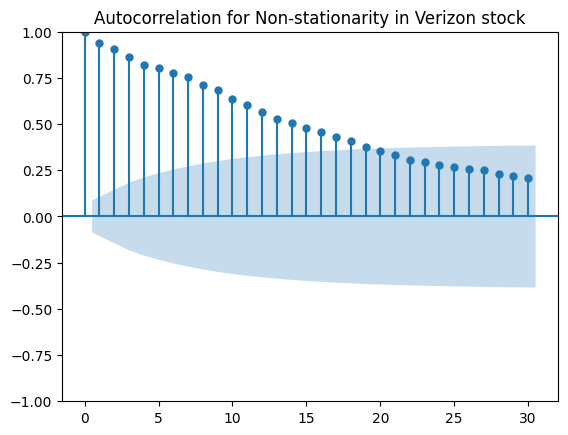

In [9]:
plot_acf(VZ,lags=30)
plt.title("Autocorrelation for Non-stationarity in Verizon stock");

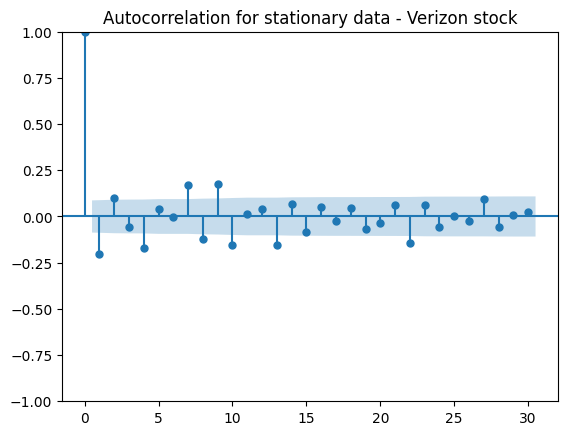

In [10]:
# Plot data with Non-stationarity removed
plot_acf(VZ_diff,lags=30);
plt.title("Autocorrelation for stationary data - Verizon stock");

### AT&T

In [11]:
T = ds['T']
adf_test(T)

Results of Dickey-Fuller Test:
Test Statistic                  -1.252554
p-value                          0.650590
#Lags Used                      13.000000
Number of Observations Used    494.000000
Critical Value (1%)             -3.443657
Critical Value (5%)             -2.867408
Critical Value (10%)            -2.569896
dtype: float64


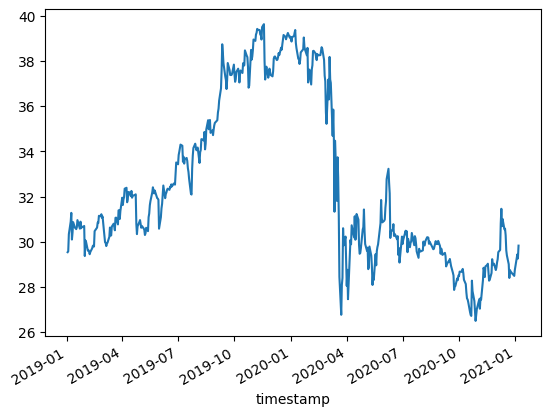

In [12]:
T.plot();

The Augmented Dickey-Fuller Test for AT&T stock prices shows the p-value obtained is greater than 0.05. So the null hypothesis that the time series is a random walk holds true. A random walk is non-stationary. In this case non-stationarity is removed by calculating the returns(or taking the difference)

In [13]:
T_diff = T.diff().dropna()

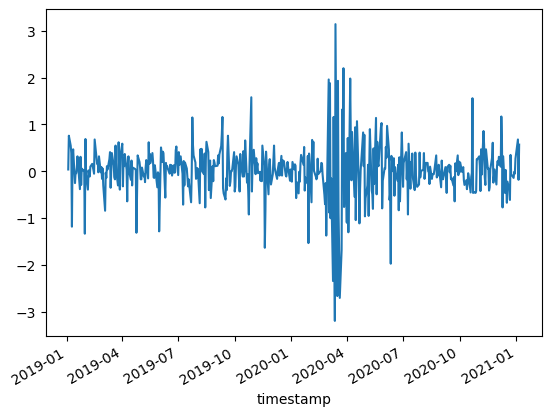

In [14]:
T_diff.plot();

Non-stationarity is removed as we observed the results by running the test after taking differences on AT&T stock time series.

In [15]:
adf_test(T_diff)

Results of Dickey-Fuller Test:
Test Statistic                -6.760867e+00
p-value                        2.794516e-09
#Lags Used                     1.200000e+01
Number of Observations Used    4.940000e+02
Critical Value (1%)           -3.443657e+00
Critical Value (5%)           -2.867408e+00
Critical Value (10%)          -2.569896e+00
dtype: float64


#### Autocorrelation plots before and after removing non-stationarity

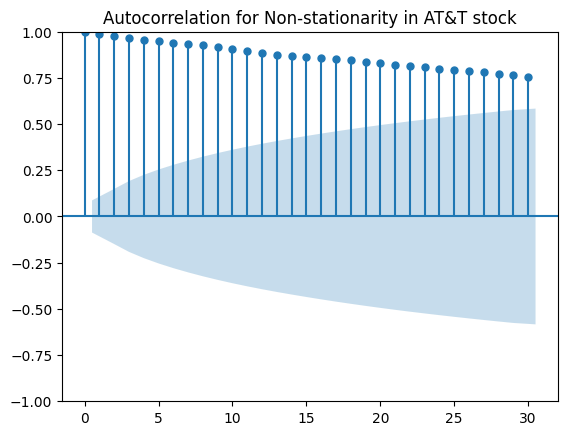

In [16]:
plot_acf(T,lags=30)
plt.title("Autocorrelation for Non-stationarity in AT&T stock");

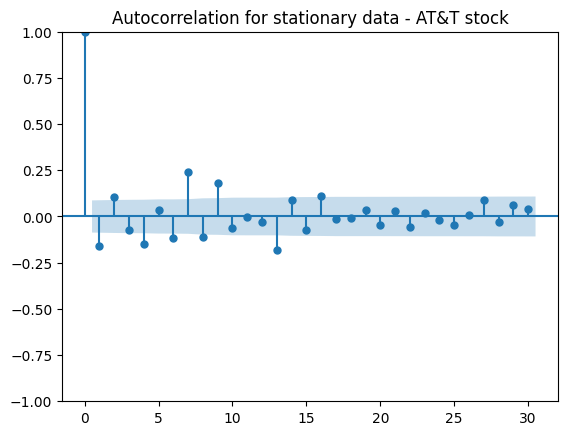

In [17]:
# Non-stationarity removed
plot_acf(T_diff,lags=30);
plt.title("Autocorrelation for stationary data - AT&T stock");

The stationary data obtained by taking differences can be used for modelling.